In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

import re 
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv', parse_dates = ['Date Created'])
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Unnamed: 0       22524 non-null  int64              
 1   Date Created     22524 non-null  datetime64[ns, UTC]
 2   Number of Likes  22524 non-null  int64              
 3   Source of Tweet  22524 non-null  object             
 4   Tweet            22524 non-null  object             
 5   Sentiment        22524 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 1.0+ MB


In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [8]:
df['Time'] = df['Date Created'].dt.time
df['WeekDay'] = df['Date Created'].dt.weekday.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
df['Month'] = df['Date Created'].dt.month
df['Date'] = df['Date Created'].dt.date
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Time,WeekDay,Month,Date
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23:59:21,Sun,11,2022-11-20
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23:59:01,Sun,11,2022-11-20
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23:58:41,Sun,11,2022-11-20
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23:58:33,Sun,11,2022-11-20
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23:58:28,Sun,11,2022-11-20


In [10]:
df['Month'].unique()   #since world cup happened in Nov

array([11], dtype=int64)

In [12]:
df['WeekDay'].unique()     #all tweets are on Sunday 20th Nov

array(['Sun'], dtype=object)

In [19]:
def getHour(timing):
    output = []
    for i in range(len(timing)):
        hour = timing[i].strftime("%H:%M:%S").split(":")[0]
        output.append(int(hour))
    return output

In [20]:
df['Hour'] = getHour(df['Time'])
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Time,WeekDay,Month,Date,Hour
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23:59:21,Sun,11,2022-11-20,23
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23:59:01,Sun,11,2022-11-20,23
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23:58:41,Sun,11,2022-11-20,23
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23:58:33,Sun,11,2022-11-20,23
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23:58:28,Sun,11,2022-11-20,23


<AxesSubplot:xlabel='Hour', ylabel='count'>

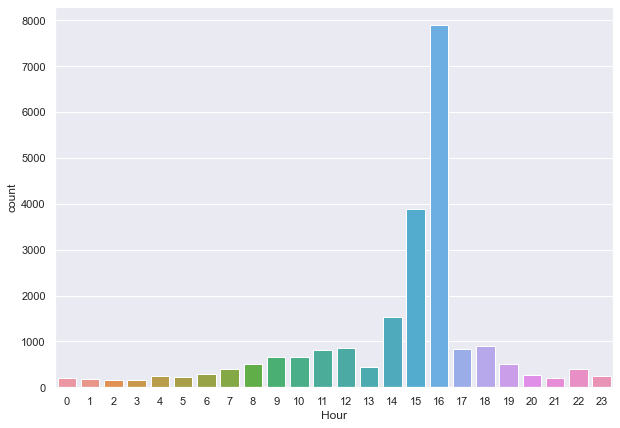

In [21]:
# Plotting number of tweets per hour
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x = 'Hour')

AS we can see that most number of tweets happened between 3 p.m. to 5 p.m.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter for Android'),
  Text(2, 0, 'Twitter Web App'),
  Text(3, 0, 'TweetDeck'),
  Text(4, 0, 'Twitter for iPad'),
  Text(5, 0, 'Qualtrics Social Connect'),
  Text(6, 0, 'Hootsuite Inc.'),
  Text(7, 0, 'Buffer'),
  Text(8, 0, 'Instagram'),
  Text(9, 0, 'Tweetbot for iΟS')])

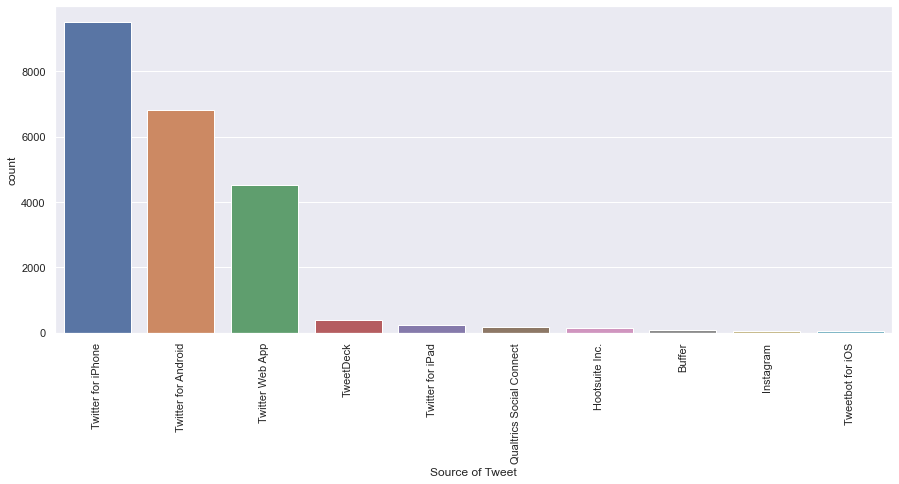

In [25]:
plt.figure(figsize = (15, 6))
sns.countplot(data = df, x = 'Source of Tweet',
             order = df['Source of Tweet'].value_counts(ascending = False)[:10].index)
plt.xticks(rotation = 90)

Most posts have been tweeted via iPhone, android & web app

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

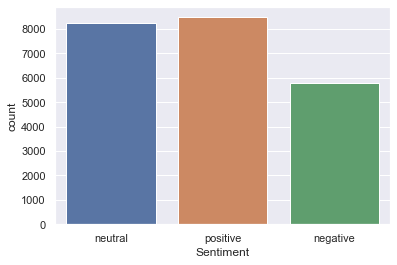

In [26]:
sns.countplot(data = df, x = 'Sentiment')

Neutral & positive sentiments are almost equal

In [30]:
stop_words = stopwords.words('english')
stop_words.append('and')

In [31]:
#clean data 
def clean(tweet):
    tweet = tweet.split(' ')
    tweet = [t for t in tweet if t not in string.punctuation]
    tweet = [t for t in tweet if t.lower() not in stop_words]
    tweet = ' '.join(tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+' , '' , tweet)
    tweet = re.sub('\n' , '' , tweet)
    tweet = re.sub(r'@','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'!','',tweet)
    tweet = tweet.replace(".","")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = tweet.replace('"'," ")
    tweet = tweet.replace('$'," ")
    tweet = tweet.replace('%'," ")
    tweet = tweet.replace('&'," ")
    tweet = " ".join(tweet.split())
    return tweet

In [32]:
df['Tweet_cleaned'] = df['Tweet'].apply(clean)
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Time,WeekDay,Month,Date,Hour,Tweet_cleaned
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23:59:21,Sun,11,2022-11-20,23,drinking today TucanTribe MadBears_ lkinc_algo...
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23:59:01,Sun,11,2022-11-20,23,Amazing CanadaSoccerEN WorldCup2022 launch vid...
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23:58:41,Sun,11,2022-11-20,23,Worth reading watching WorldCup2022
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23:58:33,Sun,11,2022-11-20,23,Golden Maknae shinning brightJeonJungkook Jung...
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23:58:28,Sun,11,2022-11-20,23,"BBC cares much human rights, homosexual rights..."


In [44]:
df.to_csv('Fifa_WC22_cleaned.csv', index = False)

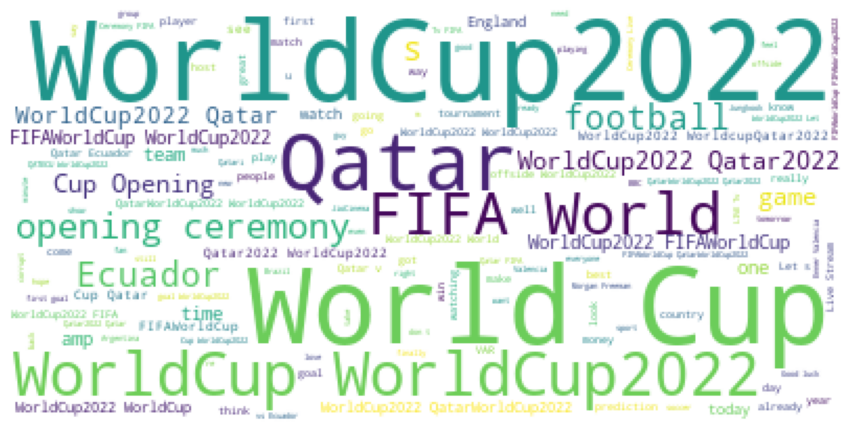

In [42]:
#creating wordcloud for all tweets
words = df['Tweet_cleaned'].tolist()
combined_words = ' '.join(words)
plt.figure(figsize = (15, 13))
plt.imshow(WordCloud(background_color = 'white').generate(combined_words))
plt.axis('off')
plt.show()

neutral


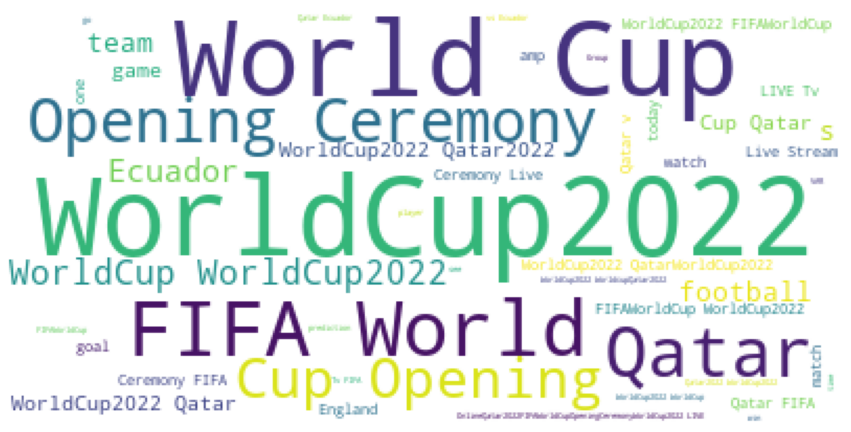

positive


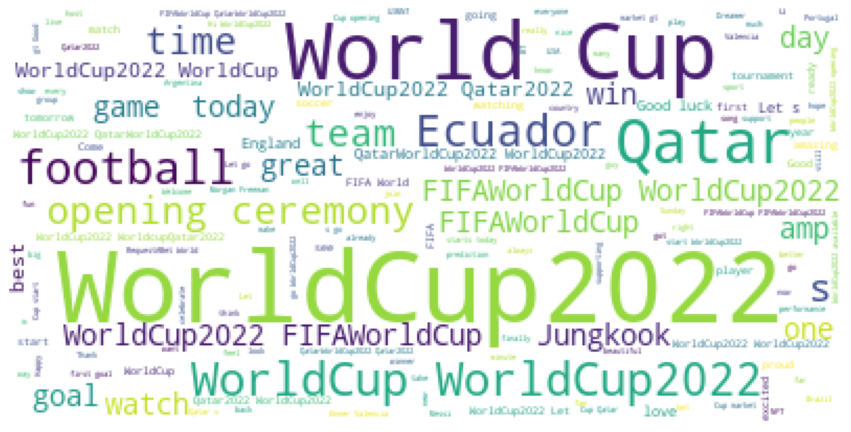

negative


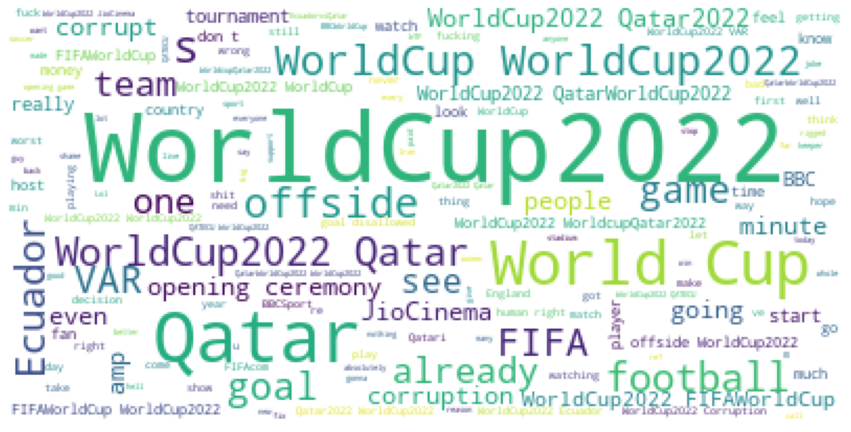

In [43]:
#creating wordcloud sentiment wise

senti = df['Sentiment'].unique()
for i in range(len(senti)):
    sent = senti[i]
    print(sent)
    df_sent = df[df['Sentiment'] == sent]['Tweet_cleaned'].tolist()
    combined_words = ' '.join(df_sent)
    plt.figure(figsize = (15, 13))
    plt.imshow(WordCloud(background_color = 'white').generate(combined_words))
    plt.axis('off')
    plt.show()
    